In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [0]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


In [0]:
path = Path("/content/drive/My Drive/pictures")
path.ls()
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=100)


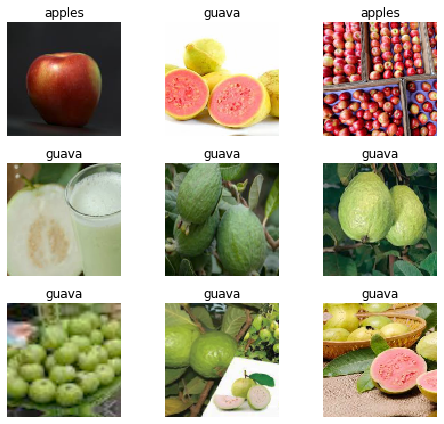

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['apples', 'guava']


(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.933774,0.456660,0.209677,02:24
1,0.652587,0.998806,0.290323,00:06
2,0.514233,0.670704,0.274194,00:04
3,0.429467,0.625855,0.225806,00:04


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

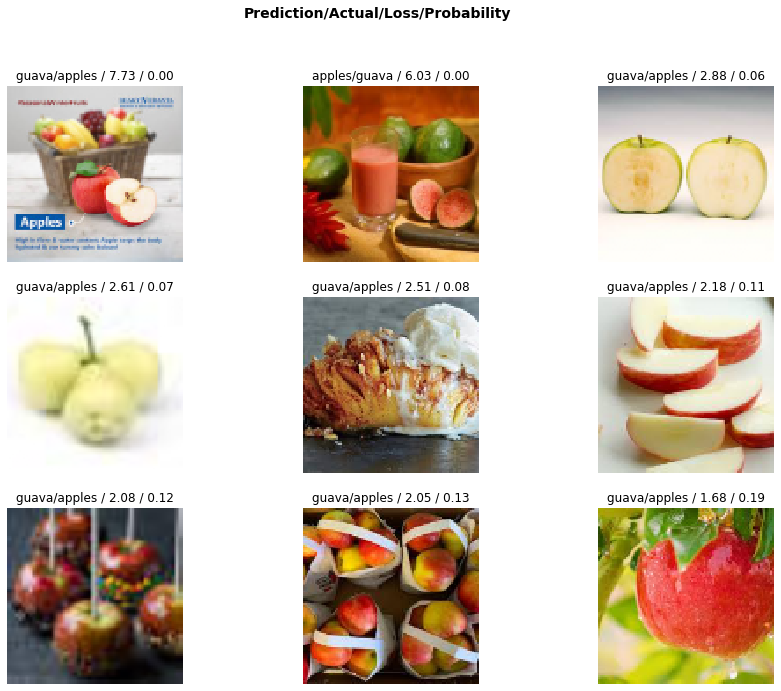

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=2)

[('apples', 'guava', 12), ('guava', 'apples', 2)]

In [0]:
learn.save('stage-1')

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.471123,0.841563,0.161290,00:04


In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


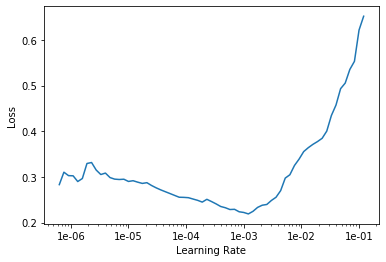

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.460512,3.343267,0.338710,00:04
1,0.673163,1.956421,0.177419,00:04


In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=224).normalize(imagenet_stats)


In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


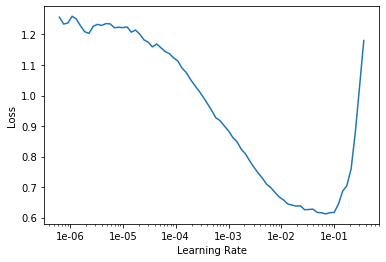

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.687144,0.497214,0.112903,00:10
1,0.504605,0.675496,0.145161,00:09
2,0.380681,0.389309,0.112903,00:09
3,0.313973,0.930622,0.161290,00:09
4,0.245360,0.504300,0.177419,00:09
5,0.206723,0.370624,0.161290,00:09
6,0.171900,0.350661,0.129032,00:09
7,0.138919,0.388288,0.129032,00:09


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.045272,0.338777,0.129032,00:11
1,0.045340,0.305299,0.129032,00:10
2,0.035230,0.266776,0.096774,00:10
